In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

In [31]:
cnn_model = load_model('conan_credential_square_ver_01.h5')
log_file_name = os.listdir('./uploads')
# log_file_name[1]
log_file_name = log_file_name[-1] # 업로드 된 파일중 가장 밑에 있는 파일을 불러옴
img_file_name = log_file_name.replace('.csv', '.png')
# df = pd.read_csv('./uploads/{0}'.format(log_file_name), header = None)
# df[[1,3,4,5,8,9]].to_csv('./uploads/{0}'.format(log_file_name))

def csv_to_img():
    hex_ = sp.check_output(['xxd','-p',f'./uploads/{log_file_name}'])    
    hex_string = str(hex_)
    hex_string = hex_string[2:-1].replace('\\n', '')
    length = 2
    hex_list = list(map(''.join, zip(*[iter(hex_string)]*length)))
    int_list = [int(x, 16) for x in hex_list]
    if len(int_list) % 4 == 1:
        for i in range(3):
            int_list.append(0)
    elif len(int_list) % 4 == 2:
        for i in range(2):
            int_list.append(0)
    elif len(int_list) % 4 == 3:
        int_list.append(0)
    int_array = np.array(int_list)
    int_array = int_array.reshape(-1,4)
    empty = np.zeros([128, 128])
    empty = empty.astype('uint8')
    for x1, y1, x2, y2 in int_array:
        empty[x1:y1, x2:y2] += 1
    cv2.imwrite('./images/{0}'.format(img_file_name), empty)
    print('sucess!')
    
csv_to_img()

sucess!


ValueError: cannot reshape array of size 49152 into shape (0,128,128,3)

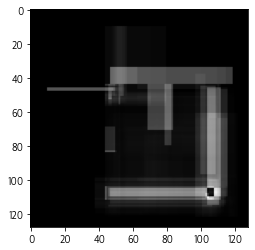

In [38]:
def predict():
    img = cv2.imread('./images/{0}'.format(img_file_name),1)
    show = plt.imshow(img)
    img = img.reshape(0, 128, 128, 3)
    predict = cnn_model.predict(img)
    return predict[0], show
predict()

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

cnn_model = load_model('conan_credential_square_ver_01.h5')
log_file_name = os.listdir('./uploads')
log_file_name = log_file_name[-1] # 업로드 된 파일중 가장 밑에 있는 파일을 불러옴
img_file_name = log_file_name.replace('.csv', '.png')

def csv_to_img():
    hex_ = sp.check_output(['xxd','-p',f'./uploads/{log_file_name}'])    
    hex_string = str(hex_)
    hex_string = hex_string[2:-1].replace('\\n', '')
    length = 2
    hex_list = list(map(''.join, zip(*[iter(hex_string)]*length)))
    int_list = [int(x, 16) for x in hex_list]
    if len(int_list) % 4 == 1:
        for i in range(3):
            int_list.append(0)
    elif len(int_list) % 4 == 2:
        for i in range(2):
            int_list.append(0)
    elif len(int_list) % 4 == 3:
        int_list.append(0)
    int_array = np.array(int_list)
    int_array = int_array.reshape(-1,4)
    empty = np.zeros([128, 128])
    empty = empty.astype('uint8')
    for x1, y1, x2, y2 in int_array:
        empty[x1:y1, x2:y2] += 1
    cv2.imwrite('./images/{0}'.format(img_file_name), empty)
    print('sucess!')

def predict():
    img = cv2.imread('./images/{0}'.format(img_file_name),1)
    img = img.reshape(-1, 128, 128, 3)
    predict = cnn_model.predict(img)
    return predict[0][0]

In [140]:
cnn_model = load_model('conan_credential_square_ver_01.h5')
log_file_name = os.listdir('./uploads')
log_file_name = log_file_name[-1] # 업로드 된 파일중 가장 밑에 있는 파일을 불러옴
img_file_name = log_file_name.replace('.csv', '.png')

def csv_to_img():
    hex_ = sp.check_output(['xxd','-p',f'./uploads/{log_file_name}'])    
    hex_string = str(hex_)
    hex_string = hex_string[2:-1].replace('\\n', '')
    length = 2
    hex_list = list(map(''.join, zip(*[iter(hex_string)]*length)))
    int_list = [int(x, 16) for x in hex_list]
    if len(int_list) % 4 == 1:
        for i in range(3):
            int_list.append(0)
    elif len(int_list) % 4 == 2:
        for i in range(2):
            int_list.append(0)
    elif len(int_list) % 4 == 3:
        int_list.append(0)
    int_array = np.array(int_list)
    int_array = int_array.reshape(-1,4)
    empty = np.zeros([128, 128])
    empty = empty.astype('uint8')
    for x1, y1, x2, y2 in int_array:
        empty[x1:y1, x2:y2] += 1
    empty = empty
    img = empty.reshape(-1, 128, 128, 3)
    result = cnn_model.predict(img)
    print(result)
    

In [141]:
csv_to_img()

ValueError: in user code:

    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [None, 128, 128, 1]


In [142]:
empty

NameError: name 'empty' is not defined